In [1]:
from torch import nn
import torch 
import sys
sys.path.append('./')
from models.rgb_pretrain.Colour_Quantisation_1 import Model as pretrainedone
# from models.rgb_pretrain.aasist import AASIST
from models.rgb_resnet.basemodel.lightcnn import LCNN

class Model(nn.Module):
    def __init__(self,args = None):
        super().__init__()
        self.pretrained = pretrainedone()
        self.classifier = LCNN(256)
        
        self.checkpoint = torch.load('/data8/wangzhiyong/project/fakeAudioDetection/rgbFAD/z_train/colour16/pretrain/version_0/checkpoints/best_model-epoch=05-batch_loss=0.409317.ckpt')
        # self.pretrained.load_state_dict(checkpoint['state_dict'].model)
        new_state_dict = {}
        for key, value in self.checkpoint['state_dict'].items():
            if key.startswith('model.'):
                new_key = key[len('model.'):]
                new_state_dict[new_key] = value
            else:
                new_state_dict[key] = value
        self.pretrained.load_state_dict(new_state_dict)

/data8/wangzhiyong/miniconda3/envs/rgb/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
md = Model()
# for (key, value),(key1, value1) in zip(md.checkpoint['state_dict'].items(),md.pretrained):
for key, value in (md.checkpoint['state_dict'].items()):
    print(value) if key =="model.Image_Encoder.encoder1.weight" else print("")
# print(md.checkpoint['state_dict'].items())

tensor([[[[-1.8130e-01, -3.7759e-02, -9.2436e-02],
          [-5.1330e-02, -1.7001e-01,  7.7228e-02],
          [-1.7251e-01, -1.2263e-02,  6.6898e-02]],

         [[-6.4870e-02,  1.0920e-01,  2.4273e-02],
          [ 1.0579e-01,  1.2348e-01, -8.4956e-02],
          [ 6.9941e-02, -8.3264e-02,  6.0326e-02]],

         [[-1.0055e-01,  8.9021e-02,  3.8961e-02],
          [-7.5314e-02, -9.4396e-02,  4.9791e-02],
          [ 1.7956e-01,  9.2357e-02, -1.8584e-02]]],


        [[[-9.3412e-03,  1.0939e-01, -1.3375e-01],
          [ 6.3980e-02, -6.3769e-02,  1.1135e-01],
          [-6.8651e-02,  9.5162e-03,  6.4987e-02]],

         [[ 1.3226e-01, -2.8287e-02,  1.7557e-01],
          [-1.6282e-01, -3.4329e-02, -1.9191e-01],
          [ 1.5943e-02,  5.4614e-02, -7.7905e-02]],

         [[ 7.9929e-02, -3.1198e-02, -1.6724e-01],
          [ 1.4775e-01,  1.1866e-01,  9.7304e-02],
          [ 1.5351e-01,  7.0768e-02,  1.0232e-01]]],


        [[[ 1.5970e-01, -3.8775e-02, -1.5009e-01],
          [-9.4

In [10]:
print(md.pretrained.Image_Encoder.encoder1.weight)
# tensor([[[[-1.8130e-01, -3.7759e-02, -9.2436e-02],
#           [-5.1330e-02, -1.7001e-01,  7.7228e-02],
#           [-1.7251e-01, -1.2263e-02,  6.6898e-02]],

Parameter containing:
tensor([[[[-1.8130e-01, -3.7759e-02, -9.2436e-02],
          [-5.1330e-02, -1.7001e-01,  7.7228e-02],
          [-1.7251e-01, -1.2263e-02,  6.6898e-02]],

         [[-6.4870e-02,  1.0920e-01,  2.4273e-02],
          [ 1.0579e-01,  1.2348e-01, -8.4956e-02],
          [ 6.9941e-02, -8.3264e-02,  6.0326e-02]],

         [[-1.0055e-01,  8.9021e-02,  3.8961e-02],
          [-7.5314e-02, -9.4396e-02,  4.9791e-02],
          [ 1.7956e-01,  9.2357e-02, -1.8584e-02]]],


        [[[-9.3412e-03,  1.0939e-01, -1.3375e-01],
          [ 6.3980e-02, -6.3769e-02,  1.1135e-01],
          [-6.8651e-02,  9.5162e-03,  6.4987e-02]],

         [[ 1.3226e-01, -2.8287e-02,  1.7557e-01],
          [-1.6282e-01, -3.4329e-02, -1.9191e-01],
          [ 1.5943e-02,  5.4614e-02, -7.7905e-02]],

         [[ 7.9929e-02, -3.1198e-02, -1.6724e-01],
          [ 1.4775e-01,  1.1866e-01,  9.7304e-02],
          [ 1.5351e-01,  7.0768e-02,  1.0232e-01]]],


        [[[ 1.5970e-01, -3.8775e-02, -1.5009

In [1]:
import torch
import soundfile
from torchaudio.compliance import kaldi
import torchaudio.transforms as T

# 假设 X 是输入的音频波形张量，假设 X 的形状为 (num_channels, num_samples)
oneaudio = torch.Tensor(soundfile.read("datasets/asvspoof2019/LA/ASVspoof2019_LA_train/flac/LA_T_1565483.flac")[0])

fbank = kaldi.fbank(oneaudio.unsqueeze(0), htk_compat=True, window_type="hanning", num_mel_bins=128)
while fbank.shape[0] < 1024:
    fbank  = torch.cat((fbank , fbank ), dim=0)
if fbank.shape[0] > 1024:
    fbank  = fbank [:1024]

In [2]:
# 输出特征的形状
print("Fbank Features Shape:", fbank.shape)

Fbank Features Shape: torch.Size([1024, 128])


torch.Size([3, 1024, 128])


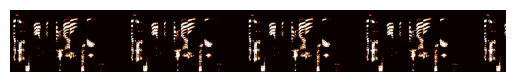

In [5]:
import matplotlib.pyplot as plt
rgb_image = plt.get_cmap('hot')(fbank)[:,:,:3]  # 去掉 alpha 通道
rgb_tensor = torch.from_numpy(rgb_image).permute(2, 0, 1)
rgb_tensor = rgb_tensor.numpy()
        
x_inp = torch.Tensor(rgb_tensor)

# x_inp = x_inp - torch.mean(x_inp) / 

print(x_inp.shape)

plt.imshow(x_inp.permute(2,1, 0).numpy())  # 注意要将通道顺序调整为 HWC
plt.axis('off')
plt.show()

In [4]:
import torch
import torch.nn.functional as F

# 示例数据
tensor = torch.randn(8, 2)

# 对张量中的每个元素进行 softmax 处理
softmax_tensor = F.softmax(tensor, dim=1)

print("Original Tensor:")
print(tensor)
print("\nSoftmax Tensor:")
print(softmax_tensor)


Original Tensor:
tensor([[-0.1109,  0.8328],
        [-0.0512,  0.7371],
        [ 0.9729,  0.0031],
        [-1.1743, -1.3422],
        [-1.3796, -1.4444],
        [-0.7454,  2.1411],
        [-0.2970, -1.2607],
        [-1.5558,  0.2835]])

Softmax Tensor:
tensor([[0.2802, 0.7198],
        [0.3125, 0.6875],
        [0.7251, 0.2749],
        [0.5419, 0.4581],
        [0.5162, 0.4838],
        [0.0528, 0.9472],
        [0.7239, 0.2761],
        [0.1371, 0.8629]])


In [1]:
(25380//24) * 100

105700

In [1]:
import os

# 定义函数遍历文件夹并记录绝对路径到 txt 文件中
def list_wav_files(directory, output_file):
    with open(output_file, 'w') as f:
        # 遍历指定文件夹下的所有文件和子文件夹
        for root, dirs, files in os.walk(directory):
            # 遍历当前文件夹下的所有文件
            for file in files:
                # 检查文件扩展名是否为 '.wav'
                if file.endswith('.wav'):
                    # 将文件的绝对路径写入到 txt 文件中
                    f.write(os.path.join(root, file) + '\n')

# 调用函数，传入文件夹路径和输出文件路径
list_wav_files('/data2/publicDatasets/vctk/VCTK-Corpus/wav48/', 'vctk.txt')


In [2]:
import torch

# 浮点数
float_value = 0.5618473291397095

# PyTorch 张量
tensor_value = torch.tensor([0., 1., 0., 0., 1., 0., 0., 0.], device='cuda:0')

# 将浮点数转换为张量，并移动到与另一个张量相同的设备上
float_tensor = torch.tensor(float_value, device=tensor_value.device)

# 将两个张量相乘
result = float_tensor * tensor_value
if tensor_value.sum() > 0:
            true_recon_loss = result.sum() / tensor_value.sum()
print(true_recon_loss)


/data8/wangzhiyong/miniconda3/envs/mae/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor(0.5618, device='cuda:0')


In [3]:
print('⭐⭐Cut  samples for next iteration\n' )


⭐⭐Cut  samples for next iteration



In [5]:
from utils.loadData.asvspoof_data_toRGB import asvspoof_dataModule
# from torch.utils.data import Dataset,DataLoader,DistributedSampler

class zzz():
    truncate = 65600
    testset = "LA21"
    batch_size=32
    usingDA = False

a = zzz()


dtmd = asvspoof_dataModule(a)
dtmd.setup("fit")

trnloader = dtmd.train_dataloader()


In [6]:
for batch in trnloader:
    print(batch[0].shape)
    break

torch.Size([32, 3, 256, 256])


In [6]:
import json
from models.mae_aasist.mae_aasist_stable import Model
conf = "/data8/wangzhiyong/project/fakeAudioDetection/maeFAD/models/mae_aasist/MAE_bank_AASIST.conf"
with open(conf, "r") as f_json:
    config = json.loads(f_json.read())
# 获取配置文件中的值
value1 = config['model_config']
model = Model(value1)

/data8/wangzhiyong/miniconda3/envs/mae/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [7]:
for batch in trnloader:
    print(batch[0].shape)
    _,loss,logits = model.forward(batch[0], is_eval=False)
    mask = (batch[1] == 1).float()
    print(mask)
    print(loss)
    loss = loss * mask
    print(loss)
    loss = loss / mask.sum()
    print(loss)
    
    
    break


torch.Size([32, 1024, 128])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])
tensor([4.1327e-05, 3.5716e-05, 3.3734e-05, 4.0366e-05, 5.2210e-05, 4.4813e-05,
        4.3018e-05, 3.4347e-05, 2.7457e-05, 3.0764e-05, 2.0287e-05, 3.8681e-05,
        3.8947e-05, 4.2649e-05, 2.6153e-05, 3.6452e-05, 1.5861e-05, 2.8322e-05,
        2.3008e-05, 3.6685e-05, 2.9172e-05, 4.1268e-05, 4.4477e-05, 2.8641e-05,
        2.6066e-05, 2.1799e-05, 4.1851e-05, 3.9360e-05, 3.6997e-05, 2.7606e-05,
        4.0515e-05, 2.3659e-05], grad_fn=<DivBackward0>)
tensor([0.0000e+00, 0.0000e+00, 3.3734e-05, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.3018e-05, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.8681e-05,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.1851e-05, 0.0000

In [8]:
loss = loss * 0.1
loss

tensor([0.0000e+00, 0.0000e+00, 8.4334e-07, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0754e-06, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.6702e-07,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0463e-06, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00], grad_fn=<MulBackward0>)

In [9]:
tensor = torch.zeros(3)
tensor

tensor([0., 0., 0.])